In [1]:
# -*- coding: <UTF-8> -*- 
import pandas as pd

In [2]:
data = pd.read_csv("COVIDMEXICO.csv")

In [3]:
data.set_index("ID_REGISTRO", inplace = True) 

In [4]:
data

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2020-05-28,2,3,2,2,2,2,2,2,2020-04-06,...,2,2,1,2,99,1,99,México,99,1
02e0df,2020-05-28,2,4,12,2,12,12,1,2,2020-03-26,...,2,1,2,2,99,1,99,México,99,1
02b7ac,2020-05-28,2,4,14,1,14,14,120,1,2020-04-07,...,2,2,2,2,99,1,99,México,99,97
17979d,2020-05-28,2,4,27,1,27,27,4,1,2020-04-20,...,2,1,2,2,99,1,99,México,99,97
15778b,2020-05-28,2,4,27,1,27,27,4,1,2020-04-09,...,2,2,2,2,99,1,99,México,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275d,2020-05-28,1,12,7,2,7,7,101,1,2020-05-26,...,2,2,2,2,2,3,99,México,99,97
107e21,2020-05-28,2,12,21,1,21,21,74,1,2020-05-27,...,2,2,2,2,1,3,99,México,99,97
0bdab3,2020-05-28,1,12,9,1,9,9,11,1,2020-05-27,...,2,2,2,2,2,3,99,México,99,97


In [5]:
data.isnull().sum().sum()

0

In [6]:
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"á", "a")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"é", "e")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"í", "i")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"ó", "o")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"ú", "u")

In [7]:
data.shape

(254794, 34)

In [8]:
data.isnull().sum().sum()

0

In [9]:
columnas = data.columns.tolist()
columnas

['FECHA_ACTUALIZACION',
 'ORIGEN',
 'SECTOR',
 'ENTIDAD_UM',
 'SEXO',
 'ENTIDAD_NAC',
 'ENTIDAD_RES',
 'MUNICIPIO_RES',
 'TIPO_PACIENTE',
 'FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA_LENGUA_INDIG',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUSUPR',
 'HIPERTENSION',
 'OTRA_COM',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL_CRONICA',
 'TABAQUISMO',
 'OTRO_CASO',
 'RESULTADO',
 'MIGRANTE',
 'PAIS_NACIONALIDAD',
 'PAIS_ORIGEN',
 'UCI']

# PREDICIENDO RESULTADO DE PRUEBA A SARS-CoV- 2

In [10]:
data.head()

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2020-05-28,2,3,2,2,2,2,2,2,2020-04-06,...,2,2,1,2,99,1,99,Mexico,99,1
02e0df,2020-05-28,2,4,12,2,12,12,1,2,2020-03-26,...,2,1,2,2,99,1,99,Mexico,99,1
02b7ac,2020-05-28,2,4,14,1,14,14,120,1,2020-04-07,...,2,2,2,2,99,1,99,Mexico,99,97
17979d,2020-05-28,2,4,27,1,27,27,4,1,2020-04-20,...,2,1,2,2,99,1,99,Mexico,99,97
15778b,2020-05-28,2,4,27,1,27,27,4,1,2020-04-09,...,2,2,2,2,99,1,99,Mexico,99,97


In [11]:
data.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI
count,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,...,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000
mean,1.636569,9.673960,14.825129,1.510758,16.063286,15.115831,36.511323,1.238824,74.316487,1.832045,...,2.189318,2.477484,2.338513,2.197752,2.332716,2.277267,32.518721,1.822331,98.570296,74.315282
std,0.480988,7.872305,7.992788,0.499885,10.697833,7.894707,47.443228,0.426366,40.525618,0.633173,...,5.873226,7.010354,5.906619,5.915636,5.826457,5.936576,45.437110,0.655526,6.452570,40.528244
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,99.000000,97.000000
50%,2.000000,12.000000,14.000000,2.000000,15.000000,15.000000,20.000000,1.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,2.000000,12.000000,21.000000,2.000000,21.000000,21.000000,48.000000,1.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,99.000000,97.000000
max,2.000000,99.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,99.000000


In [12]:
DF1 = data.drop(["UCI", "PAIS_ORIGEN", "FECHA_ACTUALIZACION", "FECHA_INGRESO", "FECHA_DEF", "INTUBADO", "NACIONALIDAD", "MIGRANTE","PAIS_ORIGEN", 'FECHA_SINTOMAS'], axis=1)

In [13]:
DF1

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,PAIS_NACIONALIDAD
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2,3,2,2,2,2,2,2,1,60,...,2,1,2,2,2,1,2,99,1,Mexico
02e0df,2,4,12,2,12,12,1,2,2,43,...,2,2,2,2,1,2,2,99,1,Mexico
02b7ac,2,4,14,1,14,14,120,1,2,26,...,2,2,2,2,2,2,2,99,1,Mexico
17979d,2,4,27,1,27,27,4,1,2,53,...,2,1,2,2,1,2,2,99,1,Mexico
15778b,2,4,27,1,27,27,4,1,2,28,...,2,2,2,2,2,2,2,99,1,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275d,1,12,7,2,7,7,101,1,2,28,...,2,2,2,2,2,2,2,2,3,Mexico
107e21,2,12,21,1,21,21,74,1,2,26,...,2,2,2,2,2,2,2,1,3,Mexico
0bdab3,1,12,9,1,9,9,11,1,2,22,...,2,2,2,2,2,2,2,2,3,Mexico


In [14]:
future = DF1.loc[DF1['RESULTADO'] == 3]

In [15]:
present = DF1.loc[DF1['RESULTADO'] < 3]

In [16]:
present.shape

(218663, 25)

In [17]:
data.shape

(254794, 34)

In [18]:
future.shape

(36131, 25)

In [19]:
future.shape[0] + present.shape[0] == data.shape[0]

True

In [20]:
present.shape[0]/float(data.shape[0])

0.8581952479257753

In [21]:
future.shape[0]/float(data.shape[0])

0.14180475207422466

## Trabajando con present: hay que revisar cuántos datos faltan (no son nulos, son 99 en muchos casos).

In [22]:
present.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'NEUMONIA', 'EDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'PAIS_NACIONALIDAD'],
      dtype='object')

In [23]:
#Origen: 1, 2, 99 USMER, externo o no especificado
len(present.loc[present['ORIGEN'] == 99, ['ORIGEN']]) #todos estan especificados

0

In [24]:
#sector:  99 es no especificado
len(present.loc[present['SECTOR'] == 99, ['SECTOR']])


1315

In [25]:
present['SECTOR'].mode()

0    12
dtype: int64

In [26]:
present.loc[present['SECTOR'] == 99, 'SECTOR'] = 12

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
len(present.loc[present['SECTOR'] == 99, ['SECTOR']])

0

In [28]:
#ENTIDADES: 99 NO ESPECIFICADO
len(present.loc[present['ENTIDAD_UM'] == 99, ['ENTIDAD_UM']]) #todos estan especificados

0

In [29]:
#SEXO
len(present.loc[present['SEXO'] == 99, ['SEXO']])

0

In [30]:
#Entidad nacional: 
len(present.loc[present['ENTIDAD_NAC'] ==99, ['ENTIDAD_NAC']])

1710

In [31]:
import random
entidades = list(range(1, 98))
present.loc[present['ENTIDAD_NAC'] == 99, 'ENTIDAD_NAC'] = random.choice(entidades)
len(present.loc[present['ENTIDAD_NAC'] ==99, ['ENTIDAD_NAC']])

0

In [32]:
#Entidad de residencia
len(present.loc[present['ENTIDAD_RES'] ==99, ['ENTIDAD_RES']])

0

In [33]:
#Municipio de residencia
len(present.loc[present['MUNICIPIO_RES'] >=98, ['MUNICIPIO_RES']])

24953

In [34]:
municipios = list(range(1, 571))
present.loc[present['MUNICIPIO_RES'] == 99, 'MUNICIPIO_RES'] = random.choice(municipios)
len(present.loc[present['MUNICIPIO_RES'] ==99, ['MUNICIPIO_RES']])

0

In [35]:
#Tipo de paciente
len(present.loc[present['TIPO_PACIENTE'] ==99, ['TIPO_PACIENTE']])

0

In [36]:
#Neumonia
len(present.loc[present['NEUMONIA'] ==99, ['NEUMONIA']])

7

In [37]:
SINO = [1,2]
present.loc[present['NEUMONIA'] == 99, 'NEUMONIA'] = random.choice(SINO)
len(present.loc[present['NEUMONIA'] ==99, ['NEUMONIA']])

0

In [38]:
#EDAD
len(present.loc[present['EDAD'] ==99, ['EDAD']])

29

In [39]:
present['EDAD'].mean()

42.539409959618226

In [40]:
present['EDAD'].mode()

0    30
dtype: int64

In [41]:
present.loc[present['EDAD'] == 99, 'EDAD'] = 30
len(present.loc[present['EDAD'] ==99, ['EDAD']])

0

In [42]:
#'EMBARAZO'
len(present.loc[present['EMBARAZO'] ==99, ['EMBARAZO']])

0

In [43]:
#'HABLA_LENGUA_INDIG'
len(present.loc[present['HABLA_LENGUA_INDIG'] ==99, ['HABLA_LENGUA_INDIG']])

5769

In [46]:
present["HABLA_LENGUA_INDIG"].replace(99 , random.choice([1,2]), inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [47]:
len(present.loc[present['HABLA_LENGUA_INDIG'] ==99, ['HABLA_LENGUA_INDIG']])

0

In [48]:
#DIABETES
len(present.loc[present['DIABETES'] >=99, ['DIABETES']])

0

In [49]:
#EPOC
len(present.loc[present['EPOC'] ==99, ['EPOC']])

0

In [50]:
#ASMA
len(present.loc[present['ASMA'] ==99, ['ASMA']])

0

In [51]:
#INMUNOSUPRESION
len(present.loc[present['INMUSUPR'] ==99, ['INMUSUPR']])

0

In [52]:
#HIPERTENSION
len(present.loc[present['HIPERTENSION'] ==99, ['HIPERTENSION']])

0

In [53]:
#OTRAS COMPLICACIONES MEDICAS
len(present.loc[present['OTRA_COM'] ==99, ['OTRA_COM']])

0

In [54]:
#PROBLEMAS CARDIOVASCULARES
len(present.loc[present['CARDIOVASCULAR'] ==99, ['CARDIOVASCULAR']])

0

In [55]:
#OBESIDAD
len(present.loc[present['OBESIDAD'] >=99, ['OBESIDAD']])

0

In [56]:
#INSUFICIENCIA RENAL CRONICA
len(present.loc[present['RENAL_CRONICA'] >=99, ['RENAL_CRONICA']])

0

In [57]:
#TABAQUISMO
len(present.loc[present['TABAQUISMO'] >=99, ['TABAQUISMO']])

0

In [58]:
#CONTACTO CON OTRO CASO DE CORONAVIRUS
len(present.loc[present['OTRO_CASO'] ==99, ['OTRO_CASO']]) #DADO DE ESTO ES ALEATORIO:

69919

In [59]:
present.loc[present['OTRO_CASO'] == 99, 'OTRO_CASO'] = random.choice(SINO)
len(present.loc[present['OTRO_CASO'] ==99, ['OTRO_CASO']])

0

In [60]:
#NACIONALIDAD
len(present.loc[present['PAIS_NACIONALIDAD'] ==99, ['PAIS_NACIONALIDAD']])

0

Separando en entrenamiento y validación

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
Y = present["RESULTADO"]
X = present.drop("RESULTADO", axis=1)
X

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,PAIS_NACIONALIDAD
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2,3,2,2,2,2,2,2,1,60,...,2,2,1,2,2,2,1,2,1,Mexico
02e0df,2,4,12,2,12,12,1,2,2,43,...,2,2,2,2,2,1,2,2,1,Mexico
02b7ac,2,4,14,1,14,14,120,1,2,26,...,2,2,2,2,2,2,2,2,1,Mexico
17979d,2,4,27,1,27,27,4,1,2,53,...,2,2,1,2,2,1,2,2,1,Mexico
15778b,2,4,27,1,27,27,4,1,2,28,...,2,2,2,2,2,2,2,2,1,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a8dce,2,12,9,1,9,9,9,1,2,16,...,2,2,2,2,2,2,2,2,1,Mexico
060777,2,4,2,2,2,2,2,1,2,24,...,2,2,1,1,2,2,2,1,1,Mexico
19955d,2,6,28,1,28,28,3,2,2,35,...,2,2,2,2,2,2,2,2,1,Mexico


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

# Utilizar Naive Bayes y Árboles de Decisión

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder

In [77]:
encod = OrdinalEncoder()

In [85]:
paises = list(set(present["PAIS_NACIONALIDAD"]))
pa = []
for i in range(len(paises)):
    pa.append([paises[i], i])

In [91]:
paises_encoded = encod.fit_transform(pa)
dic = {}
for i in range(len(paises_encoded)):
    dic[paises[i]] = paises_encoded[i][0]


{'Belice': 8.0,
 'Otro': 50.0,
 'Republica de Honduras': 63.0,
 'Ascension': 4.0,
 'Republica Checa y Republica Eslovaca': 57.0,
 'Dinamarca': 20.0,
 'Commonwealth de Dominica': 17.0,
 'Canada': 13.0,
 'Republica de Corea': 61.0,
 'Archipielago de Svalbard': 1.0,
 'Zimbabwe': 74.0,
 'Venezuela': 73.0,
 'Egipto': 22.0,
 'Grecia': 31.0,
 'Brasil': 11.0,
 'Republica Dominicana': 58.0,
 'Letonia': 43.0,
 'Eslovenia': 25.0,
 'Principado de Monaco': 56.0,
 'Austria': 6.0,
 'Australia': 5.0,
 'Colombia': 16.0,
 'Camerun': 12.0,
 'Republica de Costa Rica': 62.0,
 'Suiza': 69.0,
 'Rumania': 66.0,
 'Pakistan': 51.0,
 'Nicaragua': 48.0,
 'Estados Unidos de America': 27.0,
 'Ucrania': 72.0,
 'Polonia': 54.0,
 'Francia': 29.0,
 'Holanda': 34.0,
 'Peru': 53.0,
 'Alemania': 0.0,
 'Irlanda': 38.0,
 'Islandia': 39.0,
 'Argentina': 3.0,
 'El Salvador': 23.0,
 'China': 15.0,
 'Turquia': 71.0,
 'Republica de Angola': 60.0,
 'Republica de Panama': 65.0,
 'Bolivia': 9.0,
 'Republica Oriental del Uruguay': 5

In [145]:
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Belice',8.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Otro', 50.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica de Honduras', 63.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Ascension', 4.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica Checa y Republica Eslovaca', 57.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Dinamarca', 20.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Commonwealth de Dominica', 17.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Canada', 13.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica de Corea',61.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Zimbabwe', 74.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Venezuela', 73.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Egipto', 22.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Brasil', 11.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica Dominicana', 58.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Letonia', 43.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Eslovenia', 25.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Principado de Monaco', 56.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Austria', 6.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Australia', 5.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Colombia', 16.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Camerun', 12.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica de Costa Rica', 62.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Suiza', 69.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Rumania', 66.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Pakistan', 51.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Nicaragua', 48.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Estados Unidos de America', 27.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Ucrania', 72.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Polonia', 54.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Francia', 29.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Holanda', 34.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Peru', 53.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Alemania', 0.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Irlanda', 38.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Islandia', 39.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Argentina', 3.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('El Salvador', 23.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('China', 15.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica de Angola', 60.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica de Panama', 65.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Bolivia', 9.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica Oriental del Uruguay', 59.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Zona Neutral', 75.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Eritrea', 24.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Bangladesh', 7.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Argelia', 2.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Chile', 14.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Portugal', 55.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Japon', 42.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Rusia', 67.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Iran', 37.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Micronesia', 47.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Gran Bretaña (Reino Unido)', 30.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Republica de Mauricio', 64.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Hungria', 35.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Bosnia y Herzegovina', 10.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Italia', 41.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Mexico', 46.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Ecuador', 21.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Noruega', 49.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Macao', 44.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Israel', 40.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Suecia', 68.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Paraguay', 52.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Guatemala', 32.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Finlandia', 28.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('India', 36.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Haiti', 33.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Malasia', 45.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Gran Bretaña (Reino Unido)', 30.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Archipielago de Svalbard', 1.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Costa de Marfil', 18.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Cuba', 19.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('España', 26.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Grecia', 31.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Trieste', 70.0)
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace('Turquia', 71.0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [142]:
dic.get('Turquia')
# 'Turquia'


71.0

In [146]:
set(present["PAIS_NACIONALIDAD"])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0}

In [147]:
Y = present["RESULTADO"]
X = present.drop("RESULTADO", axis=1)
X

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,PAIS_NACIONALIDAD
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2,3,2,2,2,2,2,2,1,60,...,2,2,1,2,2,2,1,2,1,46.0
02e0df,2,4,12,2,12,12,1,2,2,43,...,2,2,2,2,2,1,2,2,1,46.0
02b7ac,2,4,14,1,14,14,120,1,2,26,...,2,2,2,2,2,2,2,2,1,46.0
17979d,2,4,27,1,27,27,4,1,2,53,...,2,2,1,2,2,1,2,2,1,46.0
15778b,2,4,27,1,27,27,4,1,2,28,...,2,2,2,2,2,2,2,2,1,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a8dce,2,12,9,1,9,9,9,1,2,16,...,2,2,2,2,2,2,2,2,1,46.0
060777,2,4,2,2,2,2,2,1,2,24,...,2,2,1,1,2,2,2,1,1,46.0
19955d,2,6,28,1,28,28,3,2,2,35,...,2,2,2,2,2,2,2,2,1,46.0


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [262]:
Arboles = DecisionTreeClassifier(max_features=24,max_depth=14, splitter='random', )

In [263]:
Arboles.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [264]:
from sklearn import metrics
primera = Arboles.predict(X_test)
metrics.average_precision_score(y_test, primera)

0.32307876611854613

In [265]:
from sklearn.metrics import classification_report
print(classification_report(y_test, primera))

              precision    recall  f1-score   support

           1       0.62      0.41      0.49     26738
           2       0.71      0.85      0.77     45421

    accuracy                           0.69     72159
   macro avg       0.66      0.63      0.63     72159
weighted avg       0.67      0.69      0.67     72159



In [267]:
path = Arboles.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

AttributeError: 'DecisionTreeClassifier' object has no attribute 'cost_complexity_pruning_path'

In [269]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

In [270]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [272]:
pred2 = clf.predict(X_test)

In [273]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     26738
           2       0.63      1.00      0.77     45421

    accuracy                           0.63     72159
   macro avg       0.31      0.50      0.39     72159
weighted avg       0.40      0.63      0.49     72159



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [377]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
pred3 = clf.predict(X_test)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     26738
           2       0.63      1.00      0.77     45421

    accuracy                           0.63     72159
   macro avg       0.31      0.50      0.39     72159
weighted avg       0.40      0.63      0.49     72159



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [277]:
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB()
clf3.fit(X_train, y_train)
pred4 = clf.predict(X_test)
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     26738
           2       0.63      1.00      0.77     45421

    accuracy                           0.63     72159
   macro avg       0.31      0.50      0.39     72159
weighted avg       0.40      0.63      0.49     72159



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [380]:
from sklearn.naive_bayes import ComplementNB
clf4 = ComplementNB()
clf4.fit(X_train, y_train)
pred5 = clf.predict(X_test)
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     26738
           2       0.63      1.00      0.77     45421

    accuracy                           0.63     72159
   macro avg       0.31      0.50      0.39     72159
weighted avg       0.40      0.63      0.49     72159



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [284]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=29)
neigh.fit(X_train, y_train)
pred6 = neigh.predict(X_test)
print(classification_report(y_test, pred6))

              precision    recall  f1-score   support

           1       0.57      0.40      0.47     26738
           2       0.70      0.82      0.76     45421

    accuracy                           0.67     72159
   macro avg       0.64      0.61      0.62     72159
weighted avg       0.65      0.67      0.65     72159



In [287]:
neigh2 = KNeighborsClassifier(n_neighbors=26, weights= 'distance')
neigh2.fit(X_train, y_train)
pred7 = neigh.predict(X_test)
print(classification_report(y_test, pred7))

              precision    recall  f1-score   support

           1       0.57      0.40      0.47     26738
           2       0.70      0.82      0.76     45421

    accuracy                           0.67     72159
   macro avg       0.64      0.61      0.62     72159
weighted avg       0.65      0.67      0.65     72159



In [289]:
from pandas.plotting import scatter_matrix

In [291]:
X_train.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'NEUMONIA', 'EDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'PAIS_NACIONALIDAD'],
      dtype='object')

In [301]:
uno = ['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES']
dos = ['MUNICIPIO_RES', 'TIPO_PACIENTE', 'NEUMONIA', 'EDAD', 'EMBARAZO']
tres = ['HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR']
cuatro = ['HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD']
cinco = ['RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'PAIS_NACIONALIDAD']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5cbcff50>,
      dtype=object)

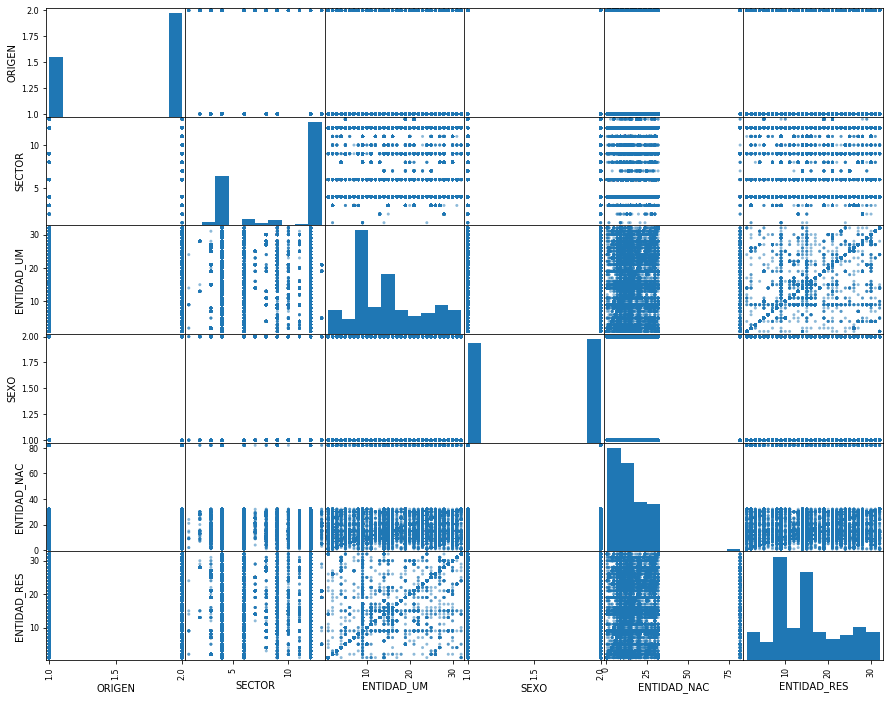

In [304]:
scatter_matrix(present[uno], figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5af51f10>,
      dtype=object)

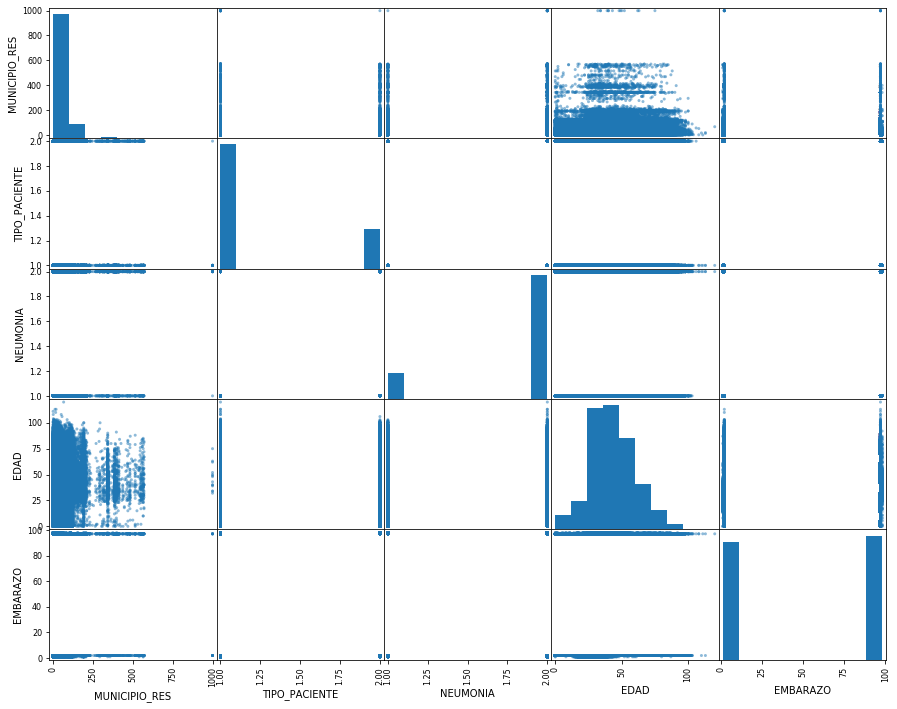

In [305]:
scatter_matrix(present[dos], figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a52917d10>,
      dtype=object)

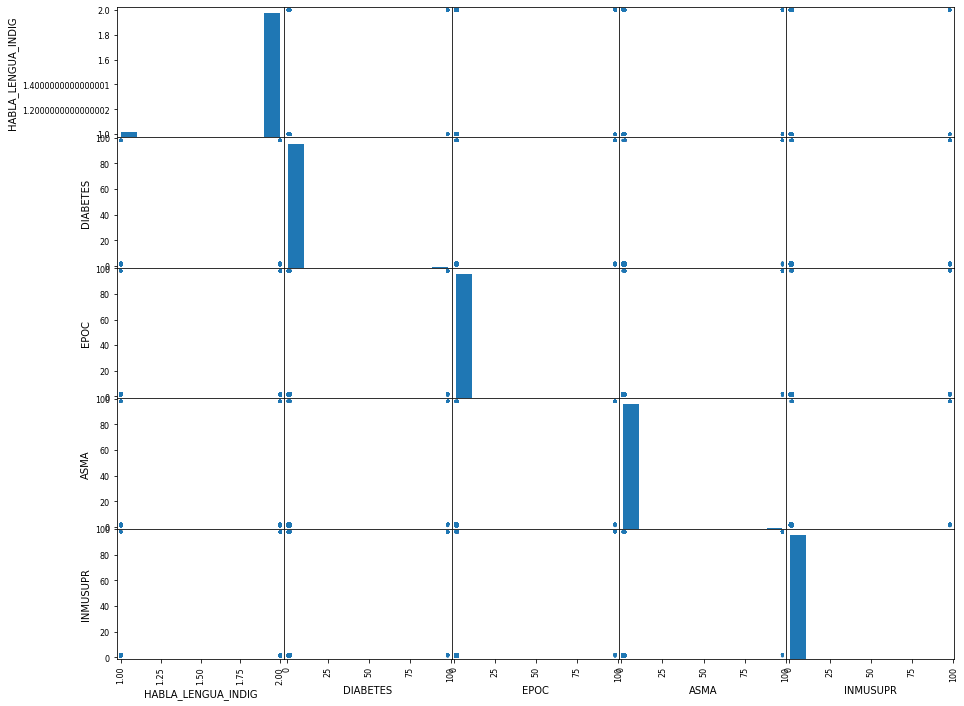

In [307]:
scatter_matrix(present[tres], figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6d13b7d0>,
      dtype=object)

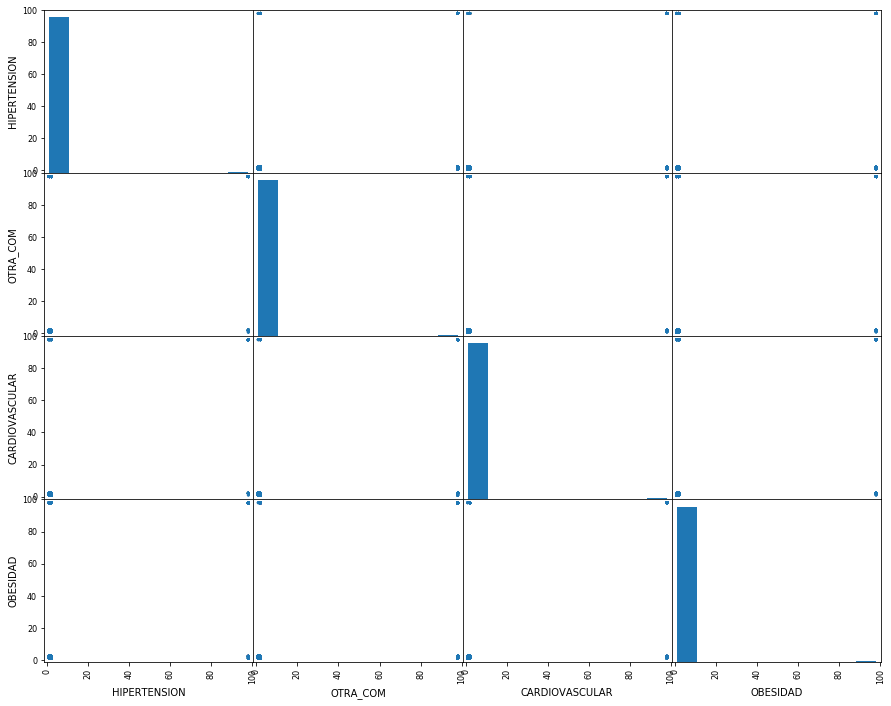

In [308]:
scatter_matrix(present[cuatro], figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a72440090>,
      dtype=object)

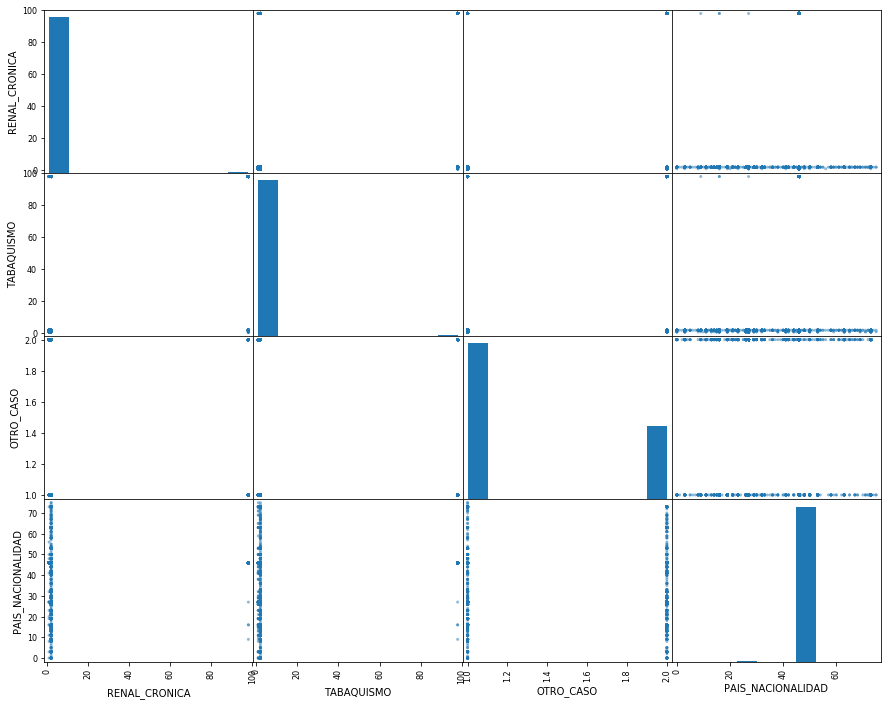

In [309]:
scatter_matrix(present[cinco], figsize=(15,12))

In [306]:
corr_matrix = X_train.corr()

In [312]:
#Edad, municipio_red, Entidad_nac
corr_matrix["EDAD"].sort_values(ascending=True)

NEUMONIA             -0.263677
SECTOR               -0.105779
ORIGEN               -0.079794
HABLA_LENGUA_INDIG   -0.007689
HIPERTENSION         -0.004768
DIABETES              0.003814
MUNICIPIO_RES         0.007135
PAIS_NACIONALIDAD     0.010177
ENTIDAD_UM            0.012403
ENTIDAD_RES           0.013735
OBESIDAD              0.015521
RENAL_CRONICA         0.018223
CARDIOVASCULAR        0.018287
EPOC                  0.018613
ENTIDAD_NAC           0.020493
TABAQUISMO            0.021154
OTRA_COM              0.021475
INMUSUPR              0.021747
ASMA                  0.021872
SEXO                  0.038198
EMBARAZO              0.038222
OTRO_CASO             0.039931
TIPO_PACIENTE         0.303135
EDAD                  1.000000
Name: EDAD, dtype: float64

In [315]:
corr_matrix["MUNICIPIO_RES"].sort_values(ascending=True)

NEUMONIA             -0.041203
SECTOR               -0.024577
HABLA_LENGUA_INDIG   -0.010361
RENAL_CRONICA        -0.000981
INMUSUPR             -0.000714
EPOC                  0.000328
ORIGEN                0.000385
ASMA                  0.000650
HIPERTENSION          0.000846
DIABETES              0.000974
OTRA_COM              0.001628
TABAQUISMO            0.001834
OBESIDAD              0.002000
EMBARAZO              0.002710
CARDIOVASCULAR        0.003049
SEXO                  0.003391
PAIS_NACIONALIDAD     0.006838
EDAD                  0.007135
OTRO_CASO             0.014577
TIPO_PACIENTE         0.051845
ENTIDAD_NAC           0.145239
ENTIDAD_UM            0.243441
ENTIDAD_RES           0.269822
MUNICIPIO_RES         1.000000
Name: MUNICIPIO_RES, dtype: float64

In [316]:
corr_matrix["ENTIDAD_NAC"].sort_values(ascending=True)

PAIS_NACIONALIDAD    -0.370511
ORIGEN               -0.042619
HABLA_LENGUA_INDIG   -0.016581
OTRA_COM             -0.008563
SECTOR               -0.008484
INMUSUPR             -0.008289
HIPERTENSION         -0.006563
NEUMONIA             -0.005963
OBESIDAD             -0.005834
RENAL_CRONICA        -0.004934
ASMA                 -0.004925
EPOC                 -0.004613
DIABETES             -0.004345
CARDIOVASCULAR       -0.004295
TABAQUISMO           -0.001899
EMBARAZO              0.017374
SEXO                  0.017440
EDAD                  0.020493
TIPO_PACIENTE         0.020790
OTRO_CASO             0.046442
MUNICIPIO_RES         0.145239
ENTIDAD_UM            0.622514
ENTIDAD_RES           0.624591
ENTIDAD_NAC           1.000000
Name: ENTIDAD_NAC, dtype: float64

In [317]:
for i in X_train.columns:
    print("Revisando: ", i)
    print(corr_matrix[i].sort_values(ascending=True))
    

Revisando:  ORIGEN
TIPO_PACIENTE        -0.233845
EDAD                 -0.079794
ENTIDAD_UM           -0.073307
ENTIDAD_RES          -0.068011
ENTIDAD_NAC          -0.042619
OTRO_CASO            -0.025157
EMBARAZO             -0.011810
PAIS_NACIONALIDAD    -0.010562
SEXO                 -0.010434
HABLA_LENGUA_INDIG   -0.005019
OTRA_COM             -0.001155
MUNICIPIO_RES         0.000385
INMUSUPR              0.009387
TABAQUISMO            0.014457
CARDIOVASCULAR        0.014615
ASMA                  0.014975
EPOC                  0.015239
RENAL_CRONICA         0.016938
HIPERTENSION          0.020681
DIABETES              0.021194
OBESIDAD              0.022188
SECTOR                0.134215
NEUMONIA              0.192820
ORIGEN                1.000000
Name: ORIGEN, dtype: float64
Revisando:  SECTOR
TIPO_PACIENTE        -0.230670
EDAD                 -0.105779
HABLA_LENGUA_INDIG   -0.088468
ENTIDAD_RES          -0.027728
ENTIDAD_UM           -0.027466
MUNICIPIO_RES        -0.024577
PAI

In [318]:
from sklearn.metrics import roc_curve

In [322]:
fpr1, tpr1, threshold1 = roc_curve(y_test, primera, pos_label=2)
fpr2, tpr2, threshold2 = roc_curve(y_test, pred2, pos_label=2)
fpr3, tpr3, threshold3 = roc_curve(y_test, pred3, pos_label=2)
fpr4, tpr4, threshold4 = roc_curve(y_test, pred4, pos_label=2)
fpr5, tpr5, threshold5 = roc_curve(y_test, pred5, pos_label=2)
fpr6, tpr6, threshold6 = roc_curve(y_test, pred6, pos_label=2)
fpr7, tpr7, threshold7 = roc_curve(y_test, pred7, pos_label=2)

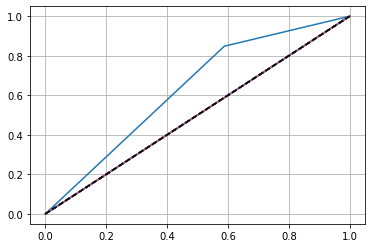

In [370]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.grid(True)
    [...]

plot_roc_curve(fpr1, tpr1)
plot_roc_curve(fpr2, tpr2)
plot_roc_curve(fpr3, tpr3)
plot_roc_curve(fpr4, tpr4)
plot_roc_curve(fpr5, tpr5)
#çplot_roc_curve(fpr6, tpr6)
#plot_roc_curve(fpr7, tpr7)
plt.show()

In [350]:
from sklearn.tree import DecisionTreeClassifier
clfTree = DecisionTreeClassifier(max_depth=11, random_state=42)
clfTree.fit(X_train, y_train)
predTree = clfTree.predict(X_test)
print(classification_report(y_test, predTree), metrics.accuracy_score(y_test, predTree))

              precision    recall  f1-score   support

           1       0.63      0.41      0.49     26738
           2       0.71      0.86      0.78     45421

    accuracy                           0.69     72159
   macro avg       0.67      0.63      0.64     72159
weighted avg       0.68      0.69      0.67     72159
 0.6923737856677614


In [358]:
clfTree.feature_importances_

array([0.01538296, 0.07115549, 0.12578786, 0.00773164, 0.02287042,
       0.09349497, 0.14690453, 0.22319945, 0.02697022, 0.16380333,
       0.01798859, 0.00254326, 0.00535532, 0.0126154 , 0.00253611,
       0.01031203, 0.00391281, 0.00916712, 0.00204232, 0.01389135,
       0.00796603, 0.00485406, 0.00853246, 0.00098227])

In [356]:
X_train.shape

(146504, 24)

In [365]:
X_train.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'NEUMONIA', 'EDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'PAIS_NACIONALIDAD'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

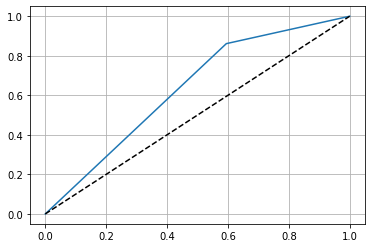

In [371]:
fpr5, tpr5, threshold5 = roc_curve(y_test, predTree, pos_label=2)
plot_roc_curve(fpr5, tpr5)
plt.show

In [372]:
from sklearn.metrics import fbeta_score

In [385]:
print("Decistion Trees 1: \n", "F_beta:",fbeta_score(y_test, primera, average='weighted', beta=0.5), "Accuracy: ", metrics.average_precision_score(y_test, primera), "the rest \n", classification_report(y_test, primera))


Decistion Trees 1: 
 F_beta: 0.6695313501227478 Accuracy:  0.32307876611854613 the rest 
               precision    recall  f1-score   support

           1       0.62      0.41      0.49     26738
           2       0.71      0.85      0.77     45421

    accuracy                           0.69     72159
   macro avg       0.66      0.63      0.63     72159
weighted avg       0.67      0.69      0.67     72159



In [384]:
print("NB Bernoulli: \n", "F_beta:",fbeta_score(y_test, pred2, average='weighted', beta=0.5), "Accuracy: ", metrics.average_precision_score(y_test, pred2), "the rest \n", classification_report(y_test, pred2))


NB Bernoulli: 
 F_beta: 0.42792957732682024 Accuracy:  0.3705428290303358 the rest 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     26738
           2       0.63      1.00      0.77     45421

    accuracy                           0.63     72159
   macro avg       0.31      0.50      0.39     72159
weighted avg       0.40      0.63      0.49     72159



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [379]:
print("NB Gaussian: \n", "F_beta:",fbeta_score(y_test, pred3, average='weighted', beta=0.5), "Accuracy: ", metrics.average_precision_score(y_test, pred3), "the rest: \n", classification_report(y_test, pred3))


NB Gaussian: 
 F_beta: 0.42792957732682024 Accuracy:  0.3705428290303358 the rest: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     26738
           2       0.63      1.00      0.77     45421

    accuracy                           0.63     72159
   macro avg       0.31      0.50      0.39     72159
weighted avg       0.40      0.63      0.49     72159



In [381]:
print("KNN - k29: \n", "F_beta:",fbeta_score(y_test, pred6, average='weighted', beta=0.5), "Accuracy: ", metrics.average_precision_score(y_test, pred6), "the rest: \n", classification_report(y_test, pred6))


KNN - k29: 
 F_beta: 0.6510542899293847 Accuracy:  0.3277964020059667 the rest: 
               precision    recall  f1-score   support

           1       0.57      0.40      0.47     26738
           2       0.70      0.82      0.76     45421

    accuracy                           0.67     72159
   macro avg       0.64      0.61      0.62     72159
weighted avg       0.65      0.67      0.65     72159



In [382]:
print("KNN - k26: \n", "F_beta:",fbeta_score(y_test, pred7, average='weighted', beta=0.5), "Accuracy: ", metrics.average_precision_score(y_test, pred7), "the rest: \n", classification_report(y_test, pred7))


KNN - k26: 
 F_beta: 0.6510542899293847 Accuracy:  0.3277964020059667 the rest: 
               precision    recall  f1-score   support

           1       0.57      0.40      0.47     26738
           2       0.70      0.82      0.76     45421

    accuracy                           0.67     72159
   macro avg       0.64      0.61      0.62     72159
weighted avg       0.65      0.67      0.65     72159



In [383]:
print("Tree 2: \n", "F_beta:",fbeta_score(y_test, predTree, average='weighted', beta=0.5), "Accuracy: ", metrics.average_precision_score(y_test, predTree), "the rest: \n", classification_report(y_test, predTree))


Tree 2: 
 F_beta: 0.6744767896081795 Accuracy:  0.3220393614399577 the rest: 
               precision    recall  f1-score   support

           1       0.63      0.41      0.49     26738
           2       0.71      0.86      0.78     45421

    accuracy                           0.69     72159
   macro avg       0.67      0.63      0.64     72159
weighted avg       0.68      0.69      0.67     72159

